In [1]:

import seaborn as sb
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np
import re
import math


# Загрузка данных


Не смотря на то, что файл несет расширение таблиц excel, внутри него находится html разметка с нестандартной кодировкой windows-1251


Так же замечено, что при попытке переименовать файл, слетает внутренняя кодировка


In [2]:
_, df = pd.read_html('./Выгрузка 9 апреля.xls',
                     attrs={"class": "mtable"}, encoding='windows-1251')


In [3]:
df.head()


,№ п/п,№ документа,Дата регистрации,Исх. № Дата,Адресат,Автор,Краткое содержание,Примечание
0,1,WSR/1-838/2019,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN


# Анализ и подготовка


Первое, что хочется сделать - перевести названия на английский


In [4]:
df.columns


Index(['№ п/п', '№ документа', 'Дата регистрации', 'Исх. № Дата', 'Адресат',
       'Автор', 'Краткое содержание', 'Примечание'],
      dtype='object')

In [5]:
name_dict = {
    '№ п/п': "row_number",
    '№ документа': "document_number",
    'Дата регистрации': "income_date",
    'Исх. № Дата': "send_document_and_date",
    'Адресат': "receiver",
    'Автор': "author",
    'Краткое содержание': "summary",
    'Примечание': "note"
}


In [6]:
df = df.rename(name_dict, axis=1)


In [7]:
df


,row_number,document_number,income_date,send_document_and_date,receiver,author,summary,note
0,1,WSR/1-838/2019,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN
4963,4964,WSR/1.-1751/2017,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN
4964,4965,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN
4965,4966,WSR/1.-1747/2017,01.11.2017,ЛО-93/06пр 24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN


Для начала посмотрим на то, какие типы данных и в каком количестве представлены


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   row_number              4967 non-null   int64 
 1   document_number         4965 non-null   object
 2   income_date             4965 non-null   object
 3   send_document_and_date  4967 non-null   object
 4   receiver                4967 non-null   object
 5   author                  4967 non-null   object
 6   summary                 4967 non-null   object
 7   note                    308 non-null    object
dtypes: int64(1), object(7)
memory usage: 310.6+ KB


Сразу можно сбросить поле примечание, потому что больше половины записей отсутствуют


In [9]:
df = df.drop(columns=['note'])


Теперь посмотрим, какие колонки сколько уникальных значений имеют. Если их число будет приближаться к количеству записей или будет только одно значение, то такие колонки будут сбрасываться


In [10]:
for column in df.columns:
    print(f'Column {column} has {len(df[column].unique())} unique values')


Column row_number has 4967 unique values
Column document_number has 4954 unique values
Column income_date has 373 unique values
Column send_document_and_date has 4842 unique values
Column receiver has 161 unique values
Column author has 2013 unique values
Column summary has 3891 unique values


Немного странно, что номер документа не уникальный, ведь он генерируется программой. Возможно есть дубликаты


Так, точно сброшу поле row_number, а остальные пока что оставлю, потому что они могут быть составными и их можно будет разбить


In [11]:
df = df.drop(columns=['row_number'])


Но, скорее всего, поле document_number и часть поля outcome_document_and_date тоже будет сброшено


Далее перед дальнейшими преобразованиям, нужно разобраться с пропусками


In [12]:
def show_na_percentage():
    total_len = len(df)
    for column in df.columns:
        percentage = (df[column].isna().sum() / total_len) * 100
        print(f'Column {column} has {percentage}% nan values')


In [13]:

show_na_percentage()


Column document_number has 0.040265753976243206% nan values
Column income_date has 0.040265753976243206% nan values
Column send_document_and_date has 0.0% nan values
Column receiver has 0.0% nan values
Column author has 0.0% nan values
Column summary has 0.0% nan values


Так записи, где нет document_number сброшу, потому что они носят практически уникальный характер


In [14]:
df = df.dropna(subset=['document_number'])


In [15]:
show_na_percentage()


Column document_number has 0.0% nan values
Column income_date has 0.0% nan values
Column send_document_and_date has 0.0% nan values
Column receiver has 0.0% nan values
Column author has 0.0% nan values
Column summary has 0.0% nan values


Отлично, так же ушли пропуски и в дате получения


Теперь я хочу проверить наличие дубликатов по номеру документа


In [16]:
df.document_number.value_counts()


document_number
WSR/1-1785/2018     2
WSR/1-2400/2018     2
WSR/1-2455/2018     2
WSR/1-2388/2018     2
WSR/1-2509/2018     2
                   ..
WSR/1-2537/2018     1
WSR/1-2538/2018     1
WSR/1-2539/2018     1
WSR/1-2540/2018     1
WSR/1.-1747/2017    1
Name: count, Length: 4953, dtype: int64

Для проверки посмотрю на записи с первыми двумя совпадениями, если они одинаковые, то сброшу дубликаты


In [17]:
df[(df.document_number == 'WSR/1-1785/2018') |
    (df.document_number == 'WSR/1-2400/2018')]


,document_number,income_date,send_document_and_date,receiver,author,summary
1785,WSR/1-2400/2018,09.10.2018,14-56/13404 08.10.2018,Уразов Р.Н.,Гафаров Ш.Х. (Аппарат Кабинета Министров Респу...,Об участии в чемпионатах Ворлдскиллс
2398,WSR/1-1785/2018,30.07.2018,14-3/10/В-5591 25.07.2018,Уразов Р.Н.,Ельцова Л.Ю. (51. Министерство труда и социаль...,Вх - О Приглашении на Финал VI Национального Ч...
4293,WSR/1-2400/2018,20.12.2017,06-1977 20.12.2017,Уразов Р.Н.,Левченко А.Н. (Министерство образования и наук...,Об оставлении на контроле пункта 1 «г» перечня...
4924,WSR/1-1785/2018,07.11.2017,ПР-2225 02.11.2017,Уразов Р.Н.,Путин В.В. (Правительство Российской Федерации),Перечень поручений по итогам встречи Президент...


Нет, это не дубликаты, но очень странно, что у них одинаковый код, может это как то связано с отправителем и получателем


In [18]:
df[(df.receiver == 'Уразов Р.Н.')]


,document_number,income_date,send_document_and_date,receiver,author,summary
0,WSR/1-838/2019,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,WSR/1-837/2019,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,WSR/1-835/2019,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
4,WSR/1-833/2019,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
6,WSR/1-830/2019,09.04.2019,24-2/10/В-1940 14.03.2019,Уразов Р.Н.,Петрова С.В. (Министерство труда и социальной ...,"Вх - О направлении протокола ""О ходе реализаци..."
...,...,...,...,...,...,...
4961,WSR/1.-1750/2017,01.11.2017,06-1333 10.10.2017,Уразов Р.Н.,Черноскутова И.А. (Министерство образования и ...,О заседании рабочей группы приоритетного проек...
4962,WSR/1.-1749/2017,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...
4963,WSR/1.-1751/2017,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...
4964,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...


Нет, но последняя цифра очень похожа на год, хотя в записях выше они не совпали. Возможно, это дата, когда внесли в систему


Теперь посмотрю на поля повнимательнее, что у них по составу, возможно некоторые можно разбить


In [19]:
for row in df.document_number[:5]:
    print(row)


WSR/1-838/2019
WSR/1-837/2019
WSR/1-835/2019
WSR/1-834/2019
WSR/1-833/2019


Код явно состоит из 3 частей:

1. "WSR" повторяется везде, можно отбросить
2. Какой то код, нужно достать и посмотреть на уникальность и частоту встречь
3. Число, которое, скорее всего год внесения в систему, отделю, но он, скорее всего, не будет влиять на предсказание


In [20]:
some_codes = []
insert_years = []

for row in df.document_number:
    _, some_code, year = row.split('/')
    some_codes.append(some_code)
    insert_years.append(year)

df['some_code'] = some_codes
df['insert_year'] = insert_years
df.insert_year = df.insert_year.astype(np.int32)
df = df.drop(columns=['document_number'])


In [21]:
df


,income_date,send_document_and_date,receiver,author,summary,some_code,insert_year
0,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,1-838,2019
1,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,1-837,2019
2,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,1-835,2019
3,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,1-834,2019
4,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,1-833,2019
...,...,...,...,...,...,...,...
4961,01.11.2017,06-1333 10.10.2017,Уразов Р.Н.,Черноскутова И.А. (Министерство образования и ...,О заседании рабочей группы приоритетного проек...,1.-1750,2017
4962,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,1.-1749,2017
4963,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,1.-1751,2017
4964,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,1.-1748,2017


Теперь посмотрю на уникальность вот этих кодов


In [22]:
len(df.some_code.unique())


4087

In [23]:
(1 - len(df.some_code.unique()) / len(df)) * 100


17.68378650553877

Они практически полностью уникальны, только 17 процентов дублирований, что очень мало и это будет вносить шум в данные


Можно попробовать разбить код еще на части до и после тире и посмотреть, что получится


In [24]:
prefix = []
postfix = []

for row in df.some_code:
    pre, post = row.split('-')
    pre = pre[:-1] if pre.endswith('.') else pre
    prefix.append(pre)
    postfix.append(int(post))

df['some_code_prefix'] = prefix
df['some_code_postfix'] = postfix
df = df.drop(columns=['some_code'])


In [25]:
df.some_code_prefix.value_counts(), df.some_code_postfix.value_counts()


(some_code_prefix
 1       3705
 1.5      487
 1.6      291
 1.10     110
 1.14      84
 1.13      71
 1.4       50
 1.7       46
 1.12      35
 1.9       34
 1.2       28
 1.3       12
 1.8        9
 1.11       3
 Name: count, dtype: int64,
 some_code_postfix
 729     3
 838     2
 2271    2
 2261    2
 2262    2
        ..
 3090    1
 3088    1
 3089    1
 3087    1
 41      1
 Name: count, Length: 3346, dtype: int64)

Так, окончание не имеет особого смысла, так как повторения там минимальны, а вот первая часть может быть полезна, так как она, скорее всего, помечает раздел или подраздел


In [26]:
df = df.drop(columns=['some_code_postfix'])


In [27]:
df


,income_date,send_document_and_date,receiver,author,summary,insert_year,some_code_prefix
0,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,2019,1
1,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,2019,1
2,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,2019,1
3,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,2019,1
4,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,2019,1
...,...,...,...,...,...,...,...
4961,01.11.2017,06-1333 10.10.2017,Уразов Р.Н.,Черноскутова И.А. (Министерство образования и ...,О заседании рабочей группы приоритетного проек...,2017,1
4962,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,2017,1
4963,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,2017,1
4964,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,2017,1


Теперь поработаю с разбиением автора сообщения на ФИО и организацию отправления


In [28]:
send_dates = []
send_document_codes = []

sub_inner = re.compile('\s+[\w]\)\)')
org_end = re.compile('\)+')


for row in df.author:
    row = sub_inner.sub(')', row)

    # Может содержать несколько частей с авторством, беру только первую, как самую важную
    author, org, *_ = row.split(' (')

    org = org_end.sub('', org)
    send_dates.append(author)
    send_document_codes.append(org)


df['sender_name'] = send_dates
df['sender_org'] = send_document_codes
df = df.drop(columns=['author'])


In [29]:
df


,income_date,send_document_and_date,receiver,summary,insert_year,some_code_prefix,sender_name,sender_org
0,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,2019,1,Антонова С.В.,АО «Интерфакс»
1,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,2019,1,Картошкин С.А.,Министерство просвещения Российской Федерации
2,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,2019,1,Цивилев С.Е.,Администрация Кемеровской области
3,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,2019,1,Волков Г.А.,Министерство транспорта Российской Федерации
4,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,2019,1,Атанов И.В.,Ставропольский государственный аграрный универ...
...,...,...,...,...,...,...,...,...
4961,01.11.2017,06-1333 10.10.2017,Уразов Р.Н.,О заседании рабочей группы приоритетного проек...,2017,1,Черноскутова И.А.,Министерство образования и науки Российской Фе...
4962,01.11.2017,11 20.10.2017,Уразов Р.Н.,Протокол заседания Президиума Совета при Прези...,2017,1,Медведев Д.А.,Аппарат Правительства Российской Федерации
4963,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,О проведении 21.11.2017 заседания организацион...,2017,1,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...
4964,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,2017,1,Огородова Л.М.,Министерство образования и науки Российской Фе...


In [30]:
df.sender_org.value_counts(), df.sender_name.value_counts()


(sender_org
 Министерство образования и науки Российской Федерации. Департамент государственной политики в сфере подготовки рабочих кадров и ДПО    147
 Министерство образования и науки Российской Федерации                                                                                   82
 Министерство просвещения Российской Федерации                                                                                           64
 Аппарат Правительства Российской Федерации                                                                                              60
 Министерство образования Тульской области                                                                                               52
                                                                                                                                       ... 
 Глава Нязепетровского городского поселения Челябинской области                                                                           1
 Верхнес

Они имеют повторения, но незначительные. Пока что их оставлю


Теперь поработаю и разделю поле send_document_and_date


In [31]:
df.send_document_and_date


0            208-409 08.04.2019
1             05-338 09.04.2019
2        И10-14/3137 09.04.2019
3         Д2/7121-ИС 03.04.2019
4       15-20/06-911 08.04.2019
                 ...           
4961         06-1333 10.10.2017
4962              11 20.10.2017
4963      ТС-1164/06 31.10.2017
4964                 ЛО-95/06пр
4965      ЛО-93/06пр 24.10.2017
Name: send_document_and_date, Length: 4965, dtype: object

Выделю номер документа и дату отправления


In [32]:
send_dates = []
send_document_codes = []
start_date_pattern = re.compile('[\d]{2}\.[\d]{2}\.[\d]{4}')


for row in df.send_document_and_date:
    first = start_date_pattern.search(row)

    if first == None:
        code = row
        date = np.nan
    else:
        start_index = first.start()
        code = row[:start_index]
        # Там может быть блок не только с датами, так что лучше достать первую часть
        date = row[start_index:].split(' ')[0]

    send_dates.append(date)
    send_document_codes.append(code)


df['send_date'] = send_dates
df['send_document_code'] = send_document_codes
df = df.drop(columns=['send_document_and_date'])


In [33]:
df


,income_date,receiver,summary,insert_year,some_code_prefix,sender_name,sender_org,send_date,send_document_code
0,09.04.2019,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,2019,1,Антонова С.В.,АО «Интерфакс»,08.04.2019,208-409
1,09.04.2019,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,2019,1,Картошкин С.А.,Министерство просвещения Российской Федерации,09.04.2019,05-338
2,09.04.2019,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,2019,1,Цивилев С.Е.,Администрация Кемеровской области,09.04.2019,И10-14/3137
3,09.04.2019,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,2019,1,Волков Г.А.,Министерство транспорта Российской Федерации,03.04.2019,Д2/7121-ИС
4,09.04.2019,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,2019,1,Атанов И.В.,Ставропольский государственный аграрный универ...,08.04.2019,15-20/06-911
...,...,...,...,...,...,...,...,...,...
4961,01.11.2017,Уразов Р.Н.,О заседании рабочей группы приоритетного проек...,2017,1,Черноскутова И.А.,Министерство образования и науки Российской Фе...,10.10.2017,06-1333
4962,01.11.2017,Уразов Р.Н.,Протокол заседания Президиума Совета при Прези...,2017,1,Медведев Д.А.,Аппарат Правительства Российской Федерации,20.10.2017,11
4963,01.11.2017,Уразов Р.Н.,О проведении 21.11.2017 заседания организацион...,2017,1,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,31.10.2017,ТС-1164/06
4964,01.11.2017,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,2017,1,Огородова Л.М.,Министерство образования и науки Российской Фе...,NaN,ЛО-95/06пр


In [34]:
df.send_document_code.value_counts()


send_document_code
б/н                 262
Б/н                  44
Нет                  10
19                    8
59                    8
                   ... 
АК-82/18              1
01-09-11/05-238       1
191/11                1
01/01-33/8183         1
ЛО-93/06пр            1
Name: count, Length: 4380, dtype: int64

Значения стремятся к количеству записей и, скорее всего, это внутренние кодировки, которые не могут дать много данных


In [35]:
df = df.drop(columns=['send_document_code'])


Но теперь появились пропуски


In [36]:
show_na_percentage()


Column income_date has 0.0% nan values
Column receiver has 0.0% nan values
Column summary has 0.0% nan values
Column insert_year has 0.0% nan values
Column some_code_prefix has 0.0% nan values
Column sender_name has 0.0% nan values
Column sender_org has 0.0% nan values
Column send_date has 0.2416918429003021% nan values


Я попробую заполнить средней разницей между начальной и конечно датой, но для начала приведу все даты к количеству секунд с начала эпохи


In [37]:
from datetime import datetime


In [38]:
from typing import Union


def get_timestamp(str_date: Union[str, None, np.nan]) -> float:
    if type(str_date) is not str:
        return np.nan
    return datetime.strptime(str_date, '%d.%m.%Y').timestamp()


In [39]:
df.income_date = df.income_date.apply(get_timestamp)
df.send_date = df.send_date.apply(get_timestamp)


Теперь временно добавлю поле, в котором будет разница между этими двумя датами


In [40]:
df['time_to_receive'] = df.income_date - df.send_date


In [41]:
df


,income_date,receiver,summary,insert_year,some_code_prefix,sender_name,sender_org,send_date,time_to_receive
0,1.554757e+09,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,2019,1,Антонова С.В.,АО «Интерфакс»,1.554671e+09,86400.0
1,1.554757e+09,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,2019,1,Картошкин С.А.,Министерство просвещения Российской Федерации,1.554757e+09,0.0
2,1.554757e+09,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,2019,1,Цивилев С.Е.,Администрация Кемеровской области,1.554757e+09,0.0
3,1.554757e+09,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,2019,1,Волков Г.А.,Министерство транспорта Российской Федерации,1.554239e+09,518400.0
4,1.554757e+09,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,2019,1,Атанов И.В.,Ставропольский государственный аграрный универ...,1.554671e+09,86400.0
...,...,...,...,...,...,...,...,...,...
4961,1.509484e+09,Уразов Р.Н.,О заседании рабочей группы приоритетного проек...,2017,1,Черноскутова И.А.,Министерство образования и науки Российской Фе...,1.507583e+09,1900800.0
4962,1.509484e+09,Уразов Р.Н.,Протокол заседания Президиума Совета при Прези...,2017,1,Медведев Д.А.,Аппарат Правительства Российской Федерации,1.508447e+09,1036800.0
4963,1.509484e+09,Уразов Р.Н.,О проведении 21.11.2017 заседания организацион...,2017,1,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,1.509397e+09,86400.0
4964,1.509484e+09,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,2017,1,Огородова Л.М.,Министерство образования и науки Российской Фе...,NaN,NaN


Теперь заполню пропуски отняв у начально даты медианную разницу


In [42]:
median_time_to_receive = df.time_to_receive.median()


In [43]:
df.loc[df.send_date.isna(), ['send_date']] = df.loc[df.send_date.isna()
                                                    ].income_date - median_time_to_receive


In [44]:
show_na_percentage()


Column income_date has 0.0% nan values
Column receiver has 0.0% nan values
Column summary has 0.0% nan values
Column insert_year has 0.0% nan values
Column some_code_prefix has 0.0% nan values
Column sender_name has 0.0% nan values
Column sender_org has 0.0% nan values
Column send_date has 0.0% nan values
Column time_to_receive has 0.2416918429003021% nan values


Отлично, теперь можно убрать промежуточный столбец


In [45]:
df = df.drop(columns=['time_to_receive'])


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4965 entries, 0 to 4965
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income_date       4965 non-null   float64
 1   receiver          4965 non-null   object 
 2   summary           4965 non-null   object 
 3   insert_year       4965 non-null   int32  
 4   some_code_prefix  4965 non-null   object 
 5   sender_name       4965 non-null   object 
 6   sender_org        4965 non-null   object 
 7   send_date         4965 non-null   float64
dtypes: float64(2), int32(1), object(5)
memory usage: 329.7+ KB


Теперь закодирую основные параметры с помощью label_encoder'а, так как столбцы имеют множество значений, в том числе и целевой. Но для удобства будет функция получения имени целевой переменной


Закодированы будут столбцы receiver, sender_name, sender_org, some_code_prefix


In [47]:
df.receiver.value_counts()


receiver
Глушко Д.Е.                                                1559
Уразов Р.Н.                                                1465
Крайчинская С.Б.                                            315
Лысова С.И.                                                 234
Тымчиков А.Ю.                                               229
                                                           ... 
Миронова С.В. Иванюк Л.А.                                     1
Недоспасова О.В. Мухаметзянов Д.Ф.                            1
Мухаметзянов Д.Ф. Тымчиков А.Ю. Судаков К.Ю.                  1
Езерская А.М.                                                 1
Картошкин С.А. Никул Е.В. Овчинников А.Ю. Кадылева Ж.М.       1
Name: count, Length: 161, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder


In [49]:
encoders: dict[str, LabelEncoder] = {}


In [50]:
def get_receiver_name(code: int) -> str:
    return encoders['receiver'].classes_[code]


In [51]:
columns_to_encode = ['receiver', 'sender_name', 'sender_org', 'some_code_prefix']\

for column in columns_to_encode:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder


In [52]:
df


,income_date,receiver,summary,insert_year,some_code_prefix,sender_name,sender_org,send_date
0,1.554757e+09,143,Вх - О возможности использования сетевого изда...,2019,0,74,111,1.554671e+09
1,1.554757e+09,143,Вх - Об участии в совещании по вопросу доработ...,2019,0,651,830,1.554757e+09
2,1.554757e+09,143,Вх - О командировании Саликовой К. и Глушко Д....,2019,0,1646,153,1.554757e+09
3,1.554757e+09,48,Вх - Об участии в Чемпионате мира по профессио...,2019,0,274,845,1.554239e+09
4,1.554757e+09,143,Вх - Об участии в церемонии открытия Вузовског...,2019,0,99,1257,1.554671e+09
...,...,...,...,...,...,...,...,...
4961,1.509484e+09,143,О заседании рабочей группы приоритетного проек...,2017,0,1675,794,1.507583e+09
4962,1.509484e+09,143,Протокол заседания Президиума Совета при Прези...,2017,0,963,206,1.508447e+09
4963,1.509484e+09,143,О проведении 21.11.2017 заседания организацион...,2017,0,1387,773,1.509397e+09
4964,1.509484e+09,143,Протокол заседания рабочей группы приоритетног...,2017,0,1105,786,1.509397e+09


Обработка теста


In [53]:
df.summary[0]


'Вх - О возможности использования сетевого издания "Информационный ресурс СПАРК" в работе Союза'

Для начала нужно избавиться от приставок Вх в тесте


In [54]:
BX_pattern = re.compile('^Вх - ')


def remove_Bx(text: str) -> str:
    return BX_pattern.sub('', text)


In [55]:
df.summary = df.summary.apply(remove_Bx)


In [56]:
df


,income_date,receiver,summary,insert_year,some_code_prefix,sender_name,sender_org,send_date
0,1.554757e+09,143,"О возможности использования сетевого издания ""...",2019,0,74,111,1.554671e+09
1,1.554757e+09,143,Об участии в совещании по вопросу доработки ФЭ...,2019,0,651,830,1.554757e+09
2,1.554757e+09,143,О командировании Саликовой К. и Глушко Д. для ...,2019,0,1646,153,1.554757e+09
3,1.554757e+09,48,Об участии в Чемпионате мира по профессиональн...,2019,0,274,845,1.554239e+09
4,1.554757e+09,143,Об участии в церемонии открытия Вузовского чем...,2019,0,99,1257,1.554671e+09
...,...,...,...,...,...,...,...,...
4961,1.509484e+09,143,О заседании рабочей группы приоритетного проек...,2017,0,1675,794,1.507583e+09
4962,1.509484e+09,143,Протокол заседания Президиума Совета при Прези...,2017,0,963,206,1.508447e+09
4963,1.509484e+09,143,О проведении 21.11.2017 заседания организацион...,2017,0,1387,773,1.509397e+09
4964,1.509484e+09,143,Протокол заседания рабочей группы приоритетног...,2017,0,1105,786,1.509397e+09


Теперь нужно убрать пробелы, знаки препинания, окончания и стоп незначащие слова


In [57]:
%pip install nltk

import nltk

nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /home/bricks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bricks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
not_ascii_pattern = re.compile("[^a-zA-Z0-9А-Яа-я]+")


def remove_and_tokenize(text: str) -> str:
    text = text.lower()
    text = not_ascii_pattern.sub(' ', text)

    stop = stopwords.words('russian')

    tokens = word_tokenize(text)

    filtered_tokens = []

    for token in tokens:
        if token in stop:
            continue
        filtered_tokens.append(token)
        
    stemmer = SnowballStemmer('russian')
    filtered_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return ' '.join(filtered_tokens)


In [59]:
df.summary = df.summary.apply(remove_and_tokenize)

In [60]:
df.summary[0]

'возможн использован сетев издан информацион ресурс спарк работ союз'

Отлично, теперь осталось только векторизовать текст

Буду использовать TfidfVectorizer так как он не только считает токены, но и нормализует это число

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
df.summary

0       возможн использован сетев издан информацион ре...
1       участ совещан вопрос доработк фэ предоставлен ...
2       командирован саликов глушк д участ заседан орг...
3       участ чемпионат мир профессиональн мастерств с...
4       участ церемон открыт вузовск чемпионат 15 апр ...
                              ...                        
4961    заседан рабоч групп приоритетн проект рабоч ка...
4962    протокол заседан президиум совет президент рф ...
4963    проведен 21 11 2017 заседан организацион комит...
4964    протокол заседан рабоч групп приоритетн проект...
4965    протокол заседан рабоч групп приоритетн проект...
Name: summary, Length: 4965, dtype: object

In [63]:
vectorizer = CountVectorizer()
a = vectorizer.fit_transform(df.summary)

In [64]:
df['summary'] = vectorizer.fit_transform(df.summary).toarray()

In [65]:
df

,income_date,receiver,summary,insert_year,some_code_prefix,sender_name,sender_org,send_date
0,1.554757e+09,143,0,2019,0,74,111,1.554671e+09
1,1.554757e+09,143,0,2019,0,651,830,1.554757e+09
2,1.554757e+09,143,0,2019,0,1646,153,1.554757e+09
3,1.554757e+09,48,0,2019,0,274,845,1.554239e+09
4,1.554757e+09,143,1,2019,0,99,1257,1.554671e+09
...,...,...,...,...,...,...,...,...
4961,1.509484e+09,143,0,2017,0,1675,794,1.507583e+09
4962,1.509484e+09,143,0,2017,0,963,206,1.508447e+09
4963,1.509484e+09,143,0,2017,0,1387,773,1.509397e+09
4964,1.509484e+09,143,0,2017,0,1105,786,1.509397e+09


In [66]:
df.summary.shape

(4965,)

# Разбиение данных

Перед разбиением нужно посмотреть сбалансированность целевой переменной

([<matplotlib.patches.Wedge at 0x7fbf7a4a6150>,
  ...],
 [Text(1.099999292356221, 0.0012477242537470403, ''),
  Text(1.0999936312114504, 0.003743166339830049, ''),
  Text(1.0999823089510445, 0.006238589161712893, ''),
  Text(1.0999715948432789, 0.00790509569415484, ''),
  Text(1.0999583559290627, 0.009571584081731324, ''),
  Text(1.0999405236740198, 0.011438722818698727, ''),
  Text(1.0999195220221243, 0.013305828595836643, ''),
  Text(1.0998878807209684, 0.015705089720749903, ''),
  Text(1.099851005903195, 0.01810427611727541, ''),
  Text(1.0998071045671582, 0.020599338426366836, ''),
  Text(1.0997730412736824, 0.022344075000670517, ''),
  Text(1.0997624639039176, 0.022858761733396682, ''),
  Text(1.0997354452733266, 0.02412364834510839, ''),
  Text(1.0996778887584937, 0.02661843300538565, ''),
  Text(1.0996172087843235, 0.029017135375041716, ''),
  Text(1.0995819052776412, 0.030325461018638176, ''),
  Text(1.0995732008051495, 0.030639452852792452, ''),
  Text(1.0995331753292608, 0.03

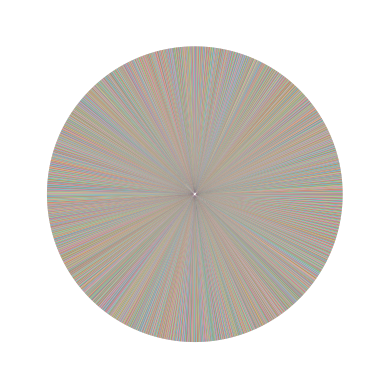

In [67]:
mpl.pie(df.receiver)

Так не особо понятно, потому что график очень мелкий. Попробую взглянуть просто на цифрах

In [70]:
df.receiver.value_counts()

Index([ 18, 143,  57,  65, 132,  96,  60, 111,  76,  36,
       ...
       113,  88,  23, 103, 129,  72,  91,  86,  44,  53],
      dtype='int64', name='receiver', length=161)